In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv(r"D:\Python USB\HP_LinearRegression\honeyproduction.csv")

In [7]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [8]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [9]:
df_year = df[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].groupby('year').sum()
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [10]:
df_year.reset_index(level=0,inplace=False)
df_year.head()

,numcol,totalprod,yieldpercol,stocks,prodvalue
year,,,,,
1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
2002,2565000.0,171265000.0,2939,39177000.0,227302000.0


In [11]:
df_year.reset_index(level=0,inplace=True)
df_year.head()

,year,numcol,totalprod,yieldpercol,stocks,prodvalue
0,1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1,1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2,2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
3,2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
4,2002,2565000.0,171265000.0,2939,39177000.0,227302000.0


In [12]:
df_year.reset_index(level=2,inplace=True)
df_year.head()

IndexError: Too many levels: Index has only 1 level, not 3

Text(0, 0.5, 'Yield per colony')

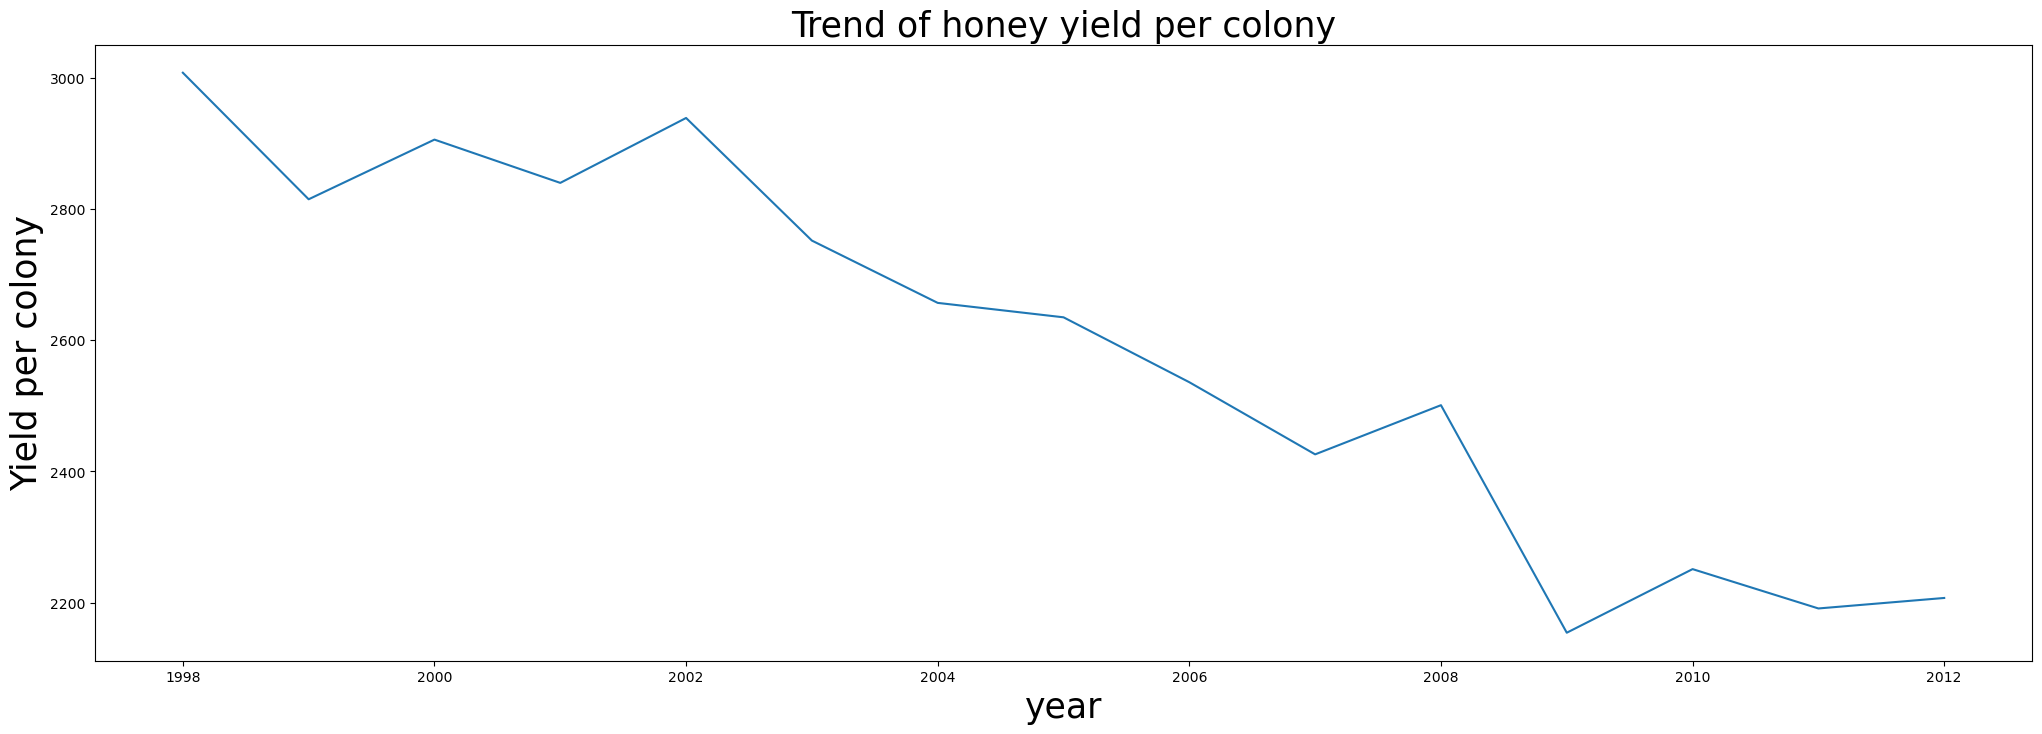

In [14]:
plt.figure(figsize=(25,8))
plt.plot(df_year['year'],df_year['yieldpercol'])
plt.title('Trend of honey yield per colony',fontsize=25)
plt.xlabel('year',fontsize = 25)
plt.ylabel('Yield per colony',fontsize = 25)

In [16]:
US_state = df[['state','totalprod','yieldpercol']].groupby('state').sum()
US_state.reset_index(level=0,inplace=True)
US_state.sort_values(by='totalprod',ascending=False,inplace=True)
US_state.head()

,state,totalprod,yieldpercol
23,ND,475085000.0,1321
3,CA,347535000.0,837
34,SD,266141000.0,1137
5,FL,247048000.0,1246
21,MT,156562000.0,1160


In [17]:
import seaborn as sns

Text(0, 0.5, 'Total Production of Honey in USA')

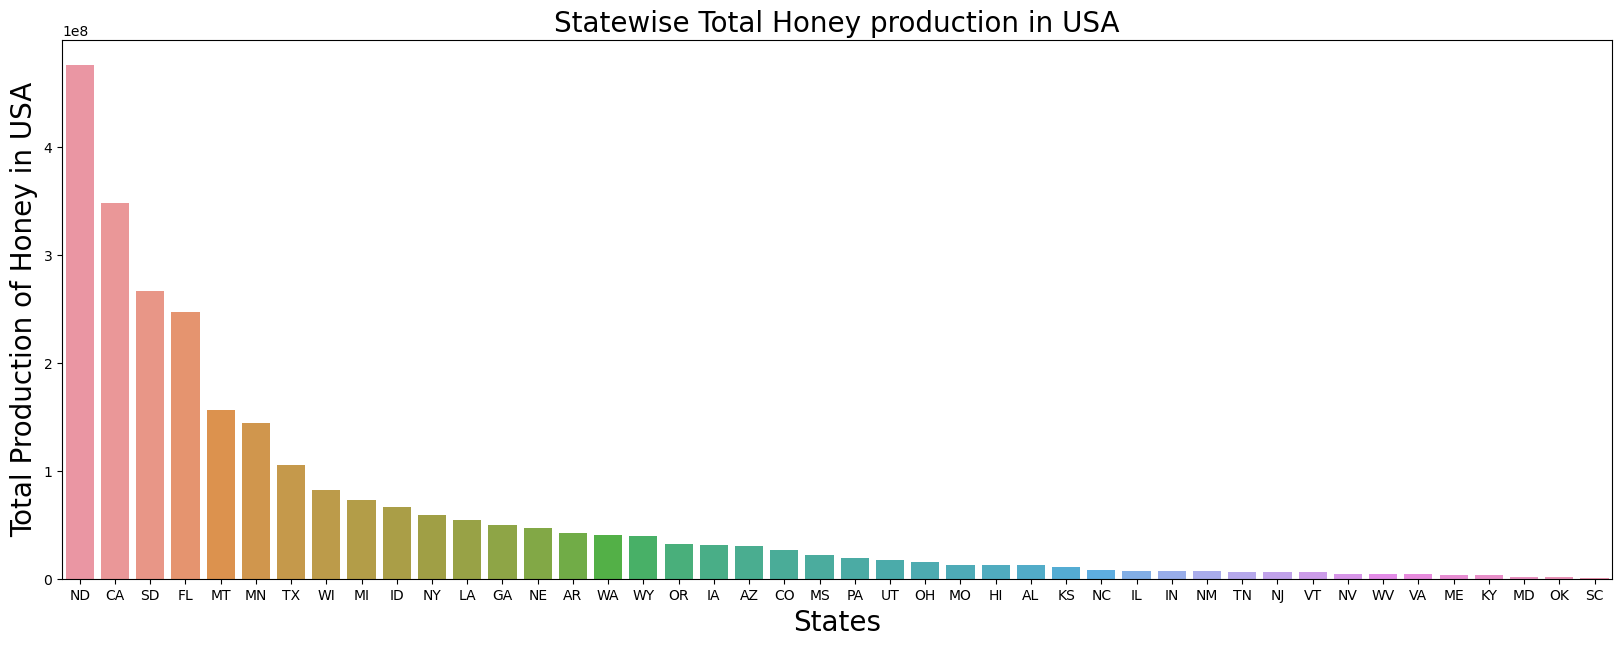

In [21]:
plt.figure(figsize=(20,7))
sns.barplot(x=US_state['state'],y = US_state['totalprod'])
plt.title('Statewise Total Honey production in USA', fontsize =20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Total Production of Honey in USA', fontsize=20)

In [23]:
#Checking the correlation between variables
honey_corr = df[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].corr()

honey_corr

,numcol,totalprod,year,yieldpercol,stocks,prodvalue
numcol,1.000000,0.953594,0.008709,0.243515,0.825929,0.912796
totalprod,0.953594,1.000000,-0.055556,0.396252,0.878830,0.907236
year,0.008709,-0.055556,1.000000,-0.232092,-0.119602,0.139451
yieldpercol,0.243515,0.396252,-0.232092,1.000000,0.367812,0.278977
stocks,0.825929,0.878830,-0.119602,0.367812,1.000000,0.728560
prodvalue,0.912796,0.907236,0.139451,0.278977,0.728560,1.000000


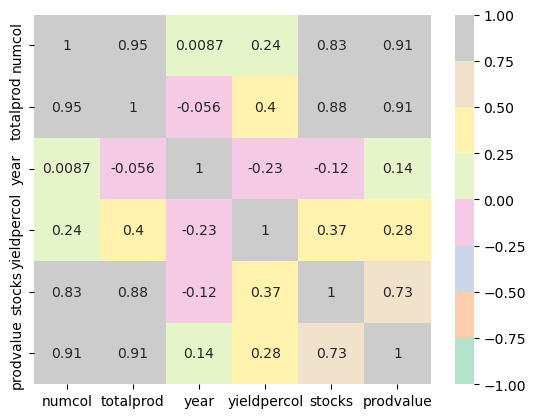

In [35]:
#Visualizing the same in Heatmap()
sns.heatmap(honey_corr, annot = True, vmin = -1, vmax = 1, cmap="Pastel2")
plt.show()